In [1]:
using Distributions
using Images, Colors, FixedPointNumbers
import Plots
Plots.gr()

Plots.GRBackend()

In [2]:
include("../src/KernelICA.jl")

kgv

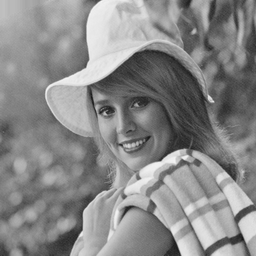

In [3]:
lena = load("../data/lena.tiff")
fabio = load("../data/fabio.tiff")
elaine = load("../data/elaine.tiff")

# Image Unmixing

In [4]:
N = 256*256
slena = float(reshape(reinterpret(UInt8,data(lena)),N))
sfabio = float(reshape(reinterpret(UInt8,data(fabio)),N))
selaine = float(reshape(reinterpret(UInt8,data(elaine)),N))

65536-element Array{Float64,1}:
 190.0
 190.0
 191.0
 192.0
 192.0
 188.0
 188.0
 186.0
 183.0
 183.0
 185.0
 185.0
 185.0
   ⋮  
 130.0
 106.0
  94.0
  88.0
  73.0
  68.0
  96.0
 142.0
 154.0
 155.0
 167.0
 169.0

In [5]:
s = [slena sfabio selaine]'

3×65536 Array{Float64,2}:
 162.0  162.0  160.0  162.0  164.0  …   80.0   91.0   99.0  103.0  106.0
 127.0  123.0  121.0  116.0  114.0     179.0  178.0  174.0  168.0  165.0
 190.0  190.0  191.0  192.0  192.0     142.0  154.0  155.0  167.0  169.0

In [6]:
A = [1/2 1/4 1/4; 1/4 1/2 1/4; 1/4 1/4 1/2]

3×3 Array{Float64,2}:
 0.5   0.25  0.25
 0.25  0.5   0.25
 0.25  0.25  0.5 

In [7]:
det(A)

0.0625

In [8]:
x = A * s

3×65536 Array{Float64,2}:
 160.25  159.25  158.0   158.0  158.5  …  128.5   131.75  135.25  136.5 
 151.5   149.5   148.25  146.5  146.0     150.25  150.5   151.5   151.25
 167.25  166.25  165.75  165.5  165.5     144.25  145.75  151.25  152.25

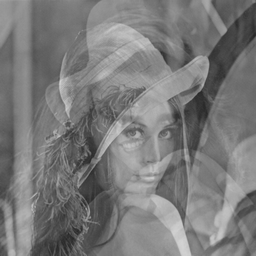

In [109]:
x_1 = reshape(x[1,:],(256,256))
x_1 = round(x_1)
x_1 = convert(Array{UInt8,2}, x_1)
imwrite(grayim(x_1),"../figures/mix1.png")
grayim(x_1)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in #imwrite#162(::Array{Any,1}, ::Function, ::Images.Image{FixedPointNumbers.UFixed{UInt8,8},2,Array{FixedPointNumbers.UFixed{UInt8,8},2}}, ::String) at ./deprecated.jl:50
 in imwrite(::Images.Image{FixedPointNumbers.UFixed{UInt8,8},2,Array{FixedPointNumbers.UFixed{UInt8,8},2}}, ::String) at ./deprecated.jl:49
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/guillaume/.julia/v0.5/IJulia/src/execute_request.jl:175
 in eventloop(::ZMQ.Socket) at /Users/guillaume/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:360
while loading In[9], in expression starting on line 4


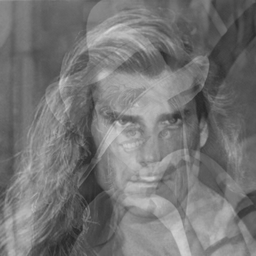

In [9]:
x_2 = reshape(x[2,:],(256,256))
x_2 = round(x_2)
x_2 = convert(Array{UInt8,2}, x_2)
imwrite(grayim(x_2),"../figures/mix2.png")
grayim(x_2)

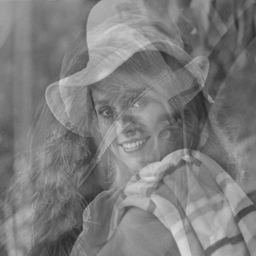

In [10]:
x_3 = reshape(x[3,:],(256,256))
x_3 = round(x_3)
x_3 = convert(Array{UInt8,2}, x_3)
imwrite(grayim(x_3),"../figures/mix3.png")
grayim(x_3)

In [14]:
size(x)

(3,65536)

In [24]:
xc, m = centering(x')
print("Centering... OK")

Centering... OK

In [25]:
xw, E, D = whiten(xc)
print("Whitening... OK")

Whitening... OK

In [11]:
using MultivariateStats

INFO: Precompiling module MultivariateStats.


In [99]:
ica = fit(ICA, xw', 3; do_whiten = false, maxiter = 100)

MultivariateStats.ICA([-6.03465e-19,6.49517e-18,2.28068e-18],[-0.144318 0.0835909 -0.985994; 0.984501 0.11247 -0.134565; -0.099646 0.990133 0.0985268])

In [100]:
s_ica = transform(ica, xw')

3×65536 Array{Float64,2}:
  0.000466286   0.000181178  …  0.00521691  0.00459961  0.00431565
  0.00504493    0.00499761      0.00222634  0.00319207  0.00334531
 -0.00263655   -0.00260516      0.00166686  0.00152542  0.00133016

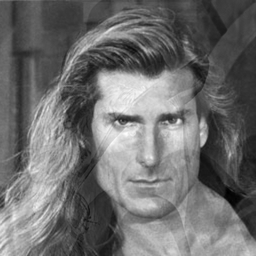

In [101]:
s_1 = reshape(s_ica[1,:],(256,256))
m1 = minimum(s_1)
M1 = maximum(s_1)
s_1 = (s_1 - m1) * 255/ (M1 - m1)
s_1 = round(s_1)
s_1 = convert(Array{UInt8,2}, s_1)
imwrite(grayim(s_1),"../figures/s1.png")
grayim(s_1)

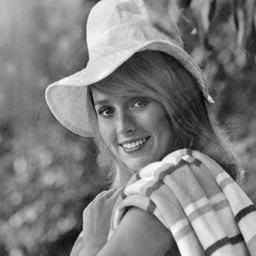

In [102]:
s_2 = reshape(s_ica[2,:],(256,256))
m1 = minimum(s_2)
M1 = maximum(s_2)
s_2 = (s_2 - m1) * 255/ (M1 - m1)
s_2 = round(s_2)
s_2 = convert(Array{UInt8,2}, s_2)
imwrite(grayim(s_2),"../figures/s2.png")
grayim(s_2)

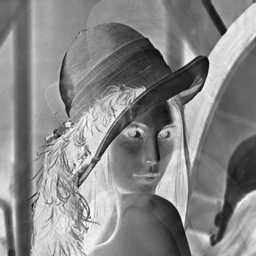

In [103]:
s_3 = reshape(s_ica[3,:],(256,256))
m1 = minimum(s_3)
M1 = maximum(s_3)
s_3 = (s_3 - m1) * 255/ (M1 - m1)
s_3 = round(s_3)
s_3 = convert(Array{UInt8,2}, s_3)
imwrite(grayim(s_3),"../figures/s3.png")
grayim(s_3)

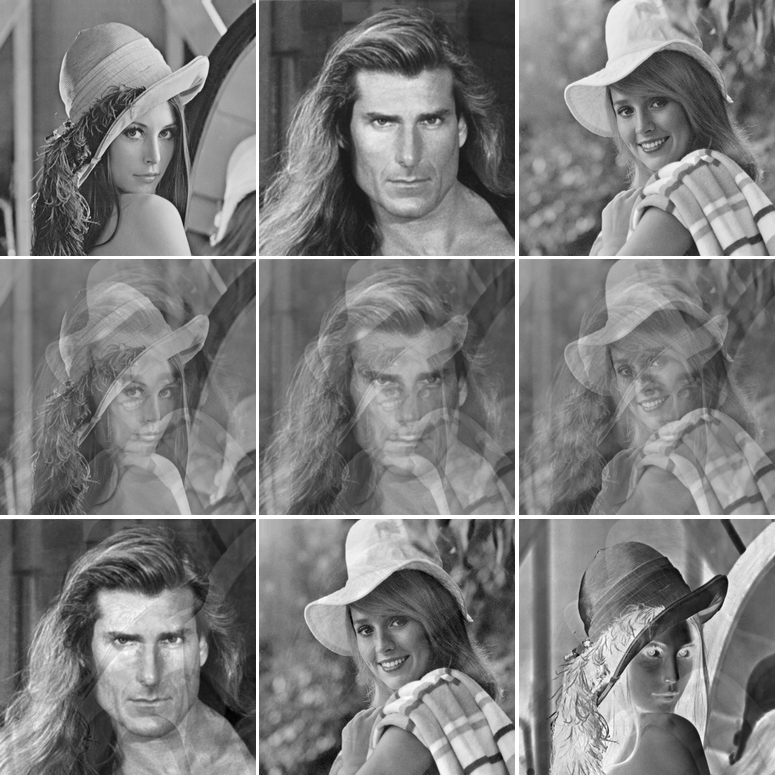

In [127]:
i1 = convert(Array{Int,2},reinterpret(UInt8,data(lena)))
i2 = convert(Array{Int,2},reinterpret(UInt8,data(fabio)))
i3 = convert(Array{Int,2},reinterpret(UInt8,data(elaine)))
i4 = convert(Array{Int,2},x_1)
i5 = convert(Array{Int,2},x_2)
i6 = convert(Array{Int,2},x_3)
i7 = convert(Array{Int,2},s_1)
i8 = convert(Array{Int,2},s_2)
i9 = convert(Array{Int,2},s_3)

imagemixing = 255*ones((768+3*4,768+3*4))
imagemixing[1:256,1:256] = i1
imagemixing[(256*1+4):(2*256+4-1),1:256] = i2
imagemixing[(256*2+4*2):(3*256+4*2-1),1:256] = i3

imagemixing[1:256,(256*1+4):(2*256+4-1)] = i4
imagemixing[(256*1+4):(2*256+4-1),(256*1+4):(2*256+4-1)] = i5
imagemixing[(256*2+4*2):(3*256+4*2-1),(256*1+4):(2*256+4-1)] = i6

imagemixing[1:256,(256*2+4*2):(3*256+4*2-1)] = i7
imagemixing[(256*1+4):(2*256+4-1),(256*2+4*2):(3*256+4*2-1)] = i8
imagemixing[(256*2+4*2):(3*256+4*2-1),(256*2+4*2):(3*256+4*2-1)] = i9

imagemixing = convert(Array{UInt8,2}, imagemixing)
imwrite(grayim(imagemixing),"../figures/imagemixing.png")
grayim(imagemixing)

In [499]:
w_fica, s_fica = fastICA(xw,3)
print("FastICA... OK")

FastICA... OK

In [ ]:
# BEWARE: WILL CONSUME ALL YOUR RAM AND THEN SOME MORE
w_kgv, s_kgv = kgv(xw')
print("KGV... OK")

In [62]:
size(s_fica)

(65536,3)

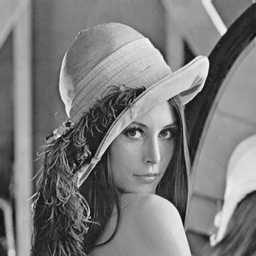

In [500]:
s_1 = reshape(s_fica[:,1],(256,256))
m1 = minimum(s_1)
M1 = maximum(s_1)
s_1 = (s_1 - m1) * 255/ (M1 - m1)
s_1 = round(s_1)
s_1 = convert(Array{UInt8,2}, s_1)
imwrite(grayim(s_1),"../figures/s1.png")
grayim(s_1)

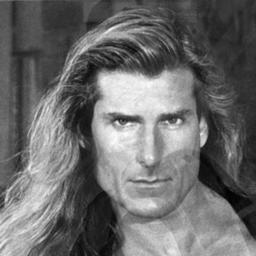

In [501]:
s_2 = reshape(s_fica[:,2],(256,256))
m2 = minimum(s_2)
M2 = maximum(s_2)
s_2 = (s_2 - m2) * 255/ (M2 - m2)
s_2 = round(s_2)
s_2 = convert(Array{UInt8,2}, s_2)
imwrite(grayim(s_2),"../figures/s2.png")
grayim(s_2)

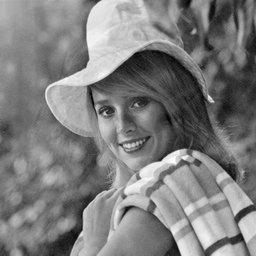

In [502]:
s_3 = reshape(s_fica[:,3],(256,256))
m3 = minimum(s_3)
M3 = maximum(s_3)
s_3 = (s_3 - m3) * 255/ (M3 - m3)
s_3 = round(s_3)
s_3 = convert(Array{UInt8,2}, s_3)
imwrite(grayim(s_3),"../figures/s3.png")
grayim(s_3)

# ICA Basis

In [564]:
img1 = load("../data/lena512.tiff")
img2 = load("../data/fabio512.tiff")
img3 = load("../data/elaine512.tiff")
f1 = float(reinterpret(UInt8,data(img1)))
f2 = float(reinterpret(UInt8,data(img2)))
f3 = float(reinterpret(UInt8,data(img3)))
print("Images Imported")

Images Imported

In [603]:
function random_patch(f, s)
    n = size(f,1)
    max = n - s
    x = rand(1:max)
    y = rand(1:max)
    return f[x:(x+s-1),y:(y+s-1)]
end

function random_patches(n, f, s)
    patches = zeros(n,s*s)
    for i = 1:n
        patch = random_patch(f, s)
        patches[i,:] = reshape(patch,s*s)
    end
    return patches
end

random_patches (generic function with 1 method)

In [635]:
samples = 20000
windows = zeros((3*samples,1024))
windows[1:samples,:] = random_patches(samples, f1, 32)
windows[(1+samples):(2*samples),:] = random_patches(samples, f2, 32)
windows[(1+2*samples):(3*samples),:] = random_patches(samples, f3, 32)

20000×1024 Array{Float64,2}:
  79.0   74.0   75.0  123.0  158.0  …   70.0   72.0   75.0   56.0   72.0
 127.0  117.0  132.0  124.0  133.0     131.0  128.0  126.0  142.0  124.0
 144.0  150.0  145.0  151.0  143.0      91.0   87.0   91.0   94.0  107.0
  95.0   94.0  114.0  100.0  103.0     114.0  113.0   98.0  106.0   95.0
  76.0  109.0   94.0   82.0   88.0      29.0   45.0   36.0   33.0   30.0
 188.0  178.0  184.0  181.0  169.0  …  151.0  158.0  153.0  163.0  156.0
  93.0   99.0   93.0   86.0   87.0     142.0  141.0  145.0  142.0  136.0
 122.0  118.0  117.0  129.0  139.0     120.0  114.0  118.0  123.0  133.0
 142.0  138.0  137.0  137.0  139.0     105.0  111.0  116.0  118.0  109.0
  66.0   58.0   77.0   54.0   63.0      90.0   82.0   79.0   95.0   92.0
 107.0  142.0  171.0  160.0  152.0  …  181.0  182.0  176.0  180.0  171.0
 162.0  153.0  162.0  156.0  148.0     163.0  167.0  163.0  173.0  164.0
 178.0  181.0  183.0  175.0  171.0      87.0  117.0  121.0  161.0  158.0
   ⋮                  

In [636]:
size(windows)

(60000,1024)

In [620]:
windows_c, _ = centering(windows)
print("Centering... Ok")

Centering... Ok

In [621]:
size(windows_c)

(60000,256)

In [622]:
windows_w , E, D = whiten(windows_c)
print("Whitening... Ok")

Whitening... Ok

In [625]:
w, coeffs = fastICA(windows_w,64)
print("FastICA... Ok")

FastICA... Ok

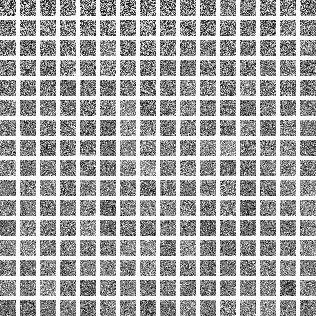

In [628]:
A = w
basis = 255*ones((256+15*4,256+15*4))
k = 1
for j = 1:8
    for i = 1:8
        temp = A[:,k]
        temp = reshape(temp,(16,16))
        m = minimum(temp)
        Ma = maximum(temp)
        temp = (temp - m) * 255/ (Ma - m)
        temp = round(temp)
        basis[(1+32*(i-1)+(i-1)*4):(32*i+(i-1)*4),(1+32*(j-1)+(j-1)*4):(32*j+(j-1)*4)] = temp
        k = k + 1
    end
end
#m = minimum(basis)
#Ma = maximum(basis)
#basis = (basis - m) * 255/ (Ma - m)
#basis = round(basis)
basis = convert(Array{UInt8,2}, basis)
imwrite(grayim(basis),"../figures/basis.png")
grayim(basis)